In [4]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [24]:
pca_df= pd.read_csv('pca_dataframe.csv', low_memory=False)
operational_df = pd.read_csv('ddos_dataset.csv', low_memory=False)

#split the dataset on train and validation in a stratified way according to the labels
X_train, X_test, y_train, y_test = train_test_split(
    pca_df,
    operational_df['label'],
    stratify=operational_df['label'],
    train_size=0.7,
    random_state=15
)

# fit the models with data and labels 
model_KNN = KNeighborsClassifier()
model_KNN.fit(X_train, y_train)

model_RFC = RandomForestClassifier()
model_RFC.fit(X_train, y_train)

model_SVC = SVC()
model_SVC.fit(X_train, y_train)

model_GNB = GaussianNB()
model_GNB.fit(X_train, y_train)

# compute predictions that will be used for the metrics computation
y_pred_train_KNN = model_KNN.predict(X_train)
y_pred_test_KNN = model_KNN.predict(X_test)

y_pred_train_RFC = model_RFC.predict(X_train)
y_pred_test_RFC = model_RFC.predict(X_test)

y_pred_train_SVC = model_SVC.predict(X_train)
y_pred_test_SVC = model_SVC.predict(X_test)

y_pred_train_GNB = model_GNB.predict(X_train)
y_pred_test_GNB = model_GNB.predict(X_test)

In [25]:
# Get unique labels
unique_labels = np.unique(y_train)
unique_labels_test = np.unique(y_test)
# Create a mapping from numerical labels to string labels
label_mapping = {i: label for i, label in enumerate(unique_labels)}

# Convert string labels to numerical labels
y_train_num = [np.where(unique_labels == label)[0][0] for label in y_train]
y_test_num = [np.where(unique_labels_test == label)[0][0] for label in y_test]

y_pred_train_KNN_num = [np.where(unique_labels == label)[0][0] for label in y_pred_train_KNN]
y_pred_test_KNN_num = [np.where(unique_labels_test == label)[0][0] for label in y_pred_test_KNN]

y_pred_train_RFC_num = [np.where(unique_labels == label)[0][0] for label in y_pred_train_RFC]
y_pred_test_RFC_num = [np.where(unique_labels_test == label)[0][0] for label in y_pred_test_RFC]

y_pred_train_SVC_num = [np.where(unique_labels == label)[0][0] for label in y_pred_train_SVC]
y_pred_test_SVC_num = [np.where(unique_labels_test == label)[0][0] for label in y_pred_test_SVC]

y_pred_train_GNB_num = [np.where(unique_labels == label)[0][0] for label in y_pred_train_GNB]
y_pred_test_GNB_num = [np.where(unique_labels_test == label)[0][0] for label in y_pred_test_GNB]

model: KNN
train set predictions evaluation
              precision    recall  f1-score   support

      benign       0.99      1.00      1.00      3961
    ddos_dns       0.98      0.96      0.97      3758
   ddos_ldap       0.97      0.97      0.97      4149
  ddos_mssql       0.98      0.98      0.98      4138
ddos_netbios       0.99      0.99      0.99      4081
    ddos_ntp       0.95      0.97      0.96       690
   ddos_snmp       1.00      1.00      1.00      4189
   ddos_ssdp       0.99      1.00      1.00      4179
    ddos_syn       0.99      0.99      0.99      3836
   ddos_tftp       0.99      0.99      0.99      3683
    ddos_udp       1.00      1.00      1.00      4113
ddos_udp_lag       1.00      1.00      1.00      4190

    accuracy                           0.99     44967
   macro avg       0.99      0.99      0.99     44967
weighted avg       0.99      0.99      0.99     44967

test set predictions evaluation
              precision    recall  f1-score   support

  

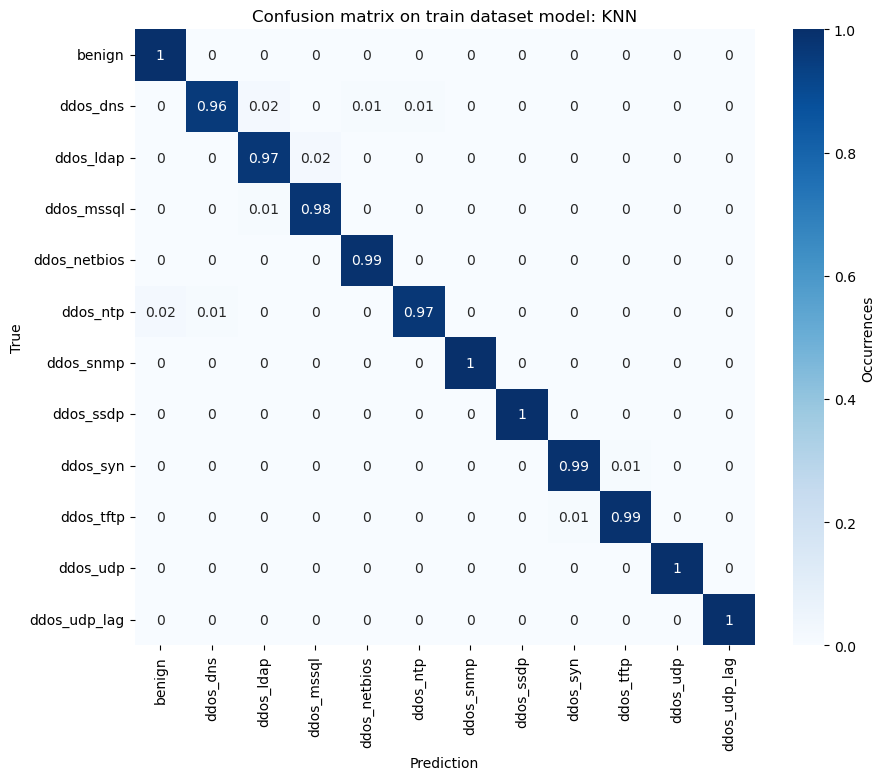

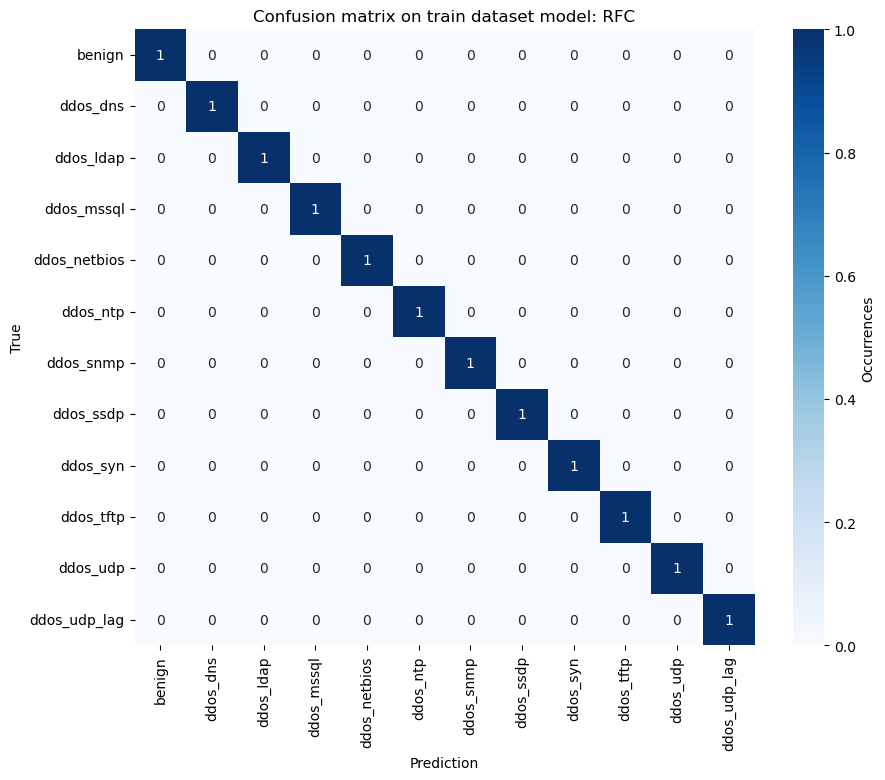

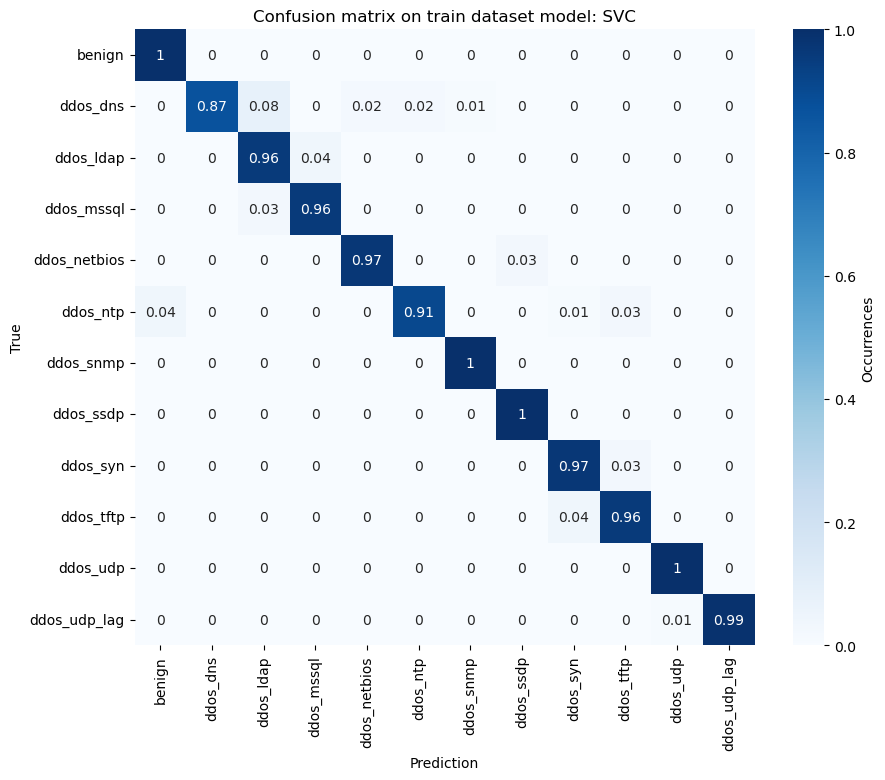

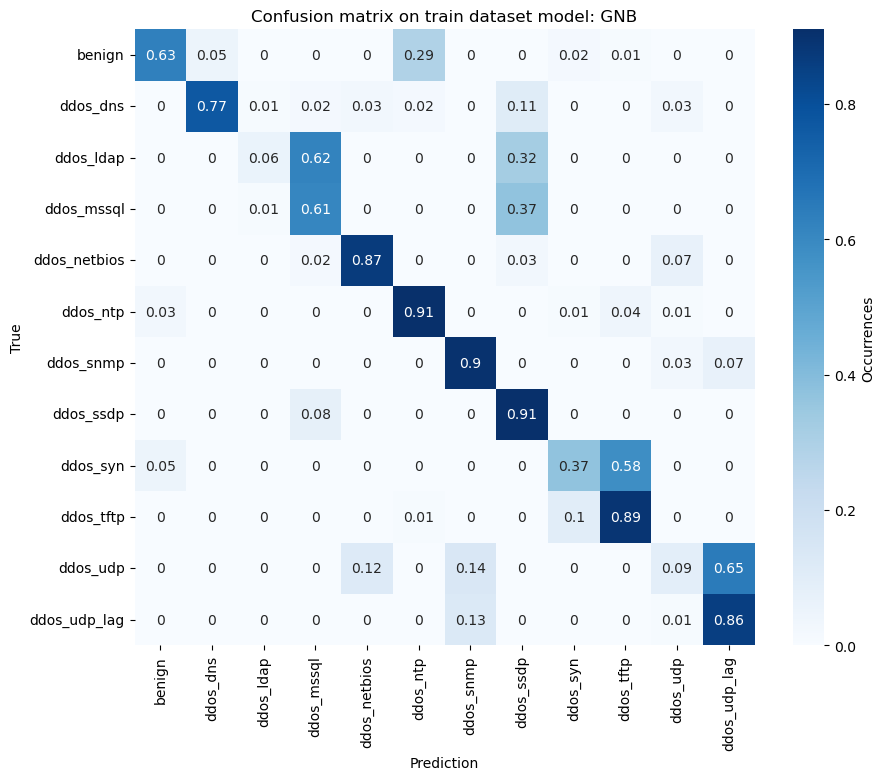

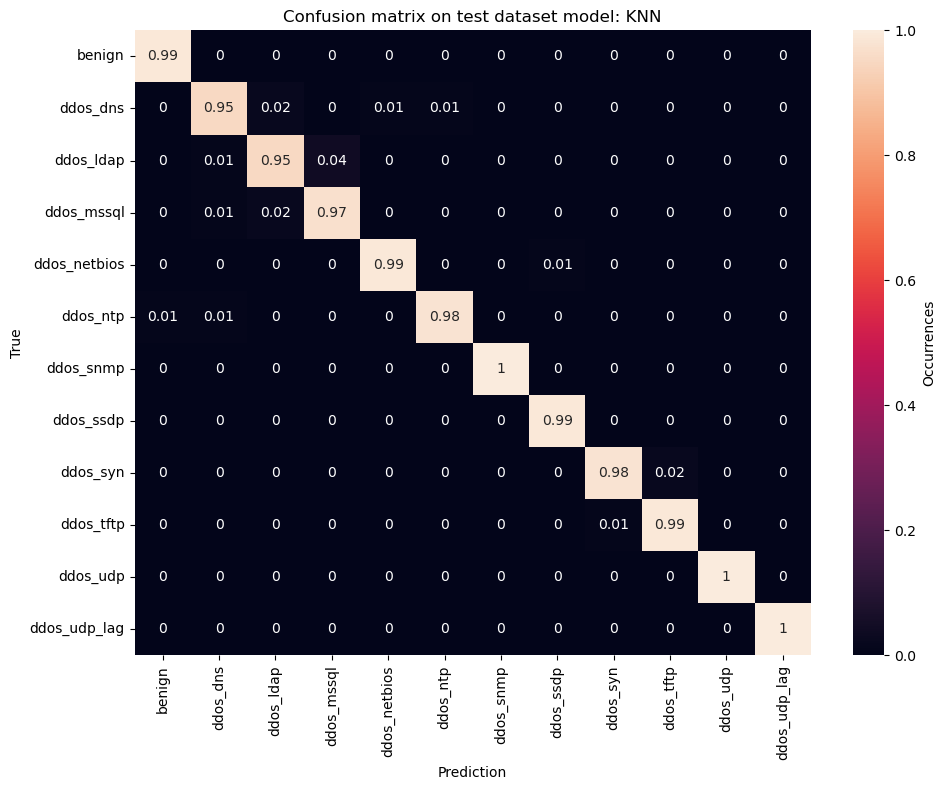

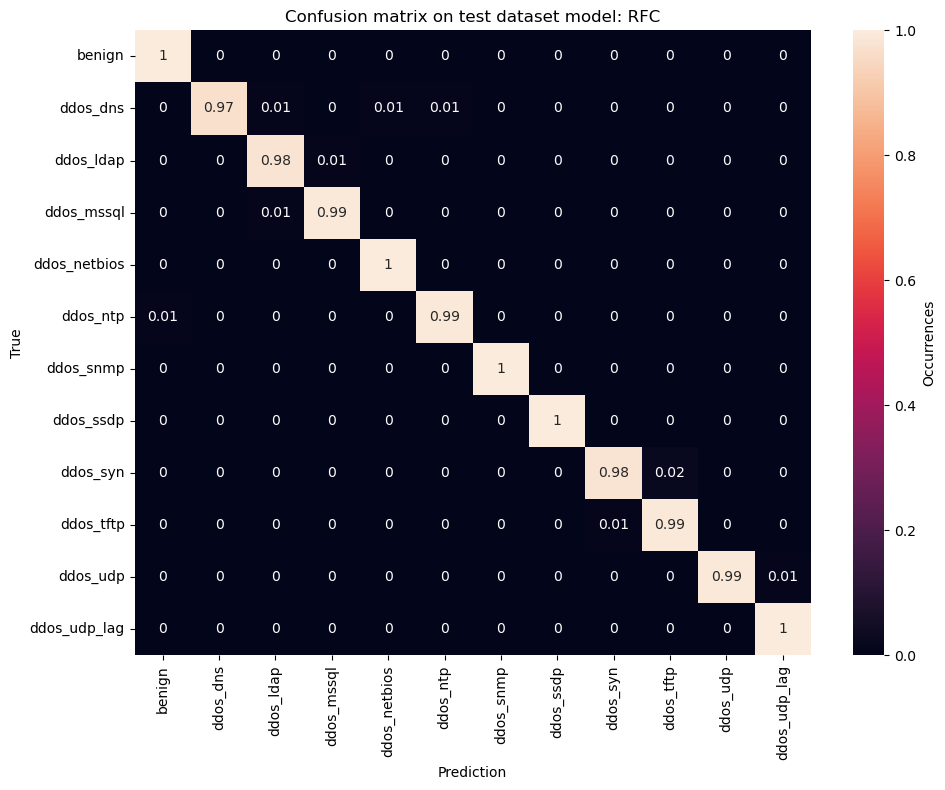

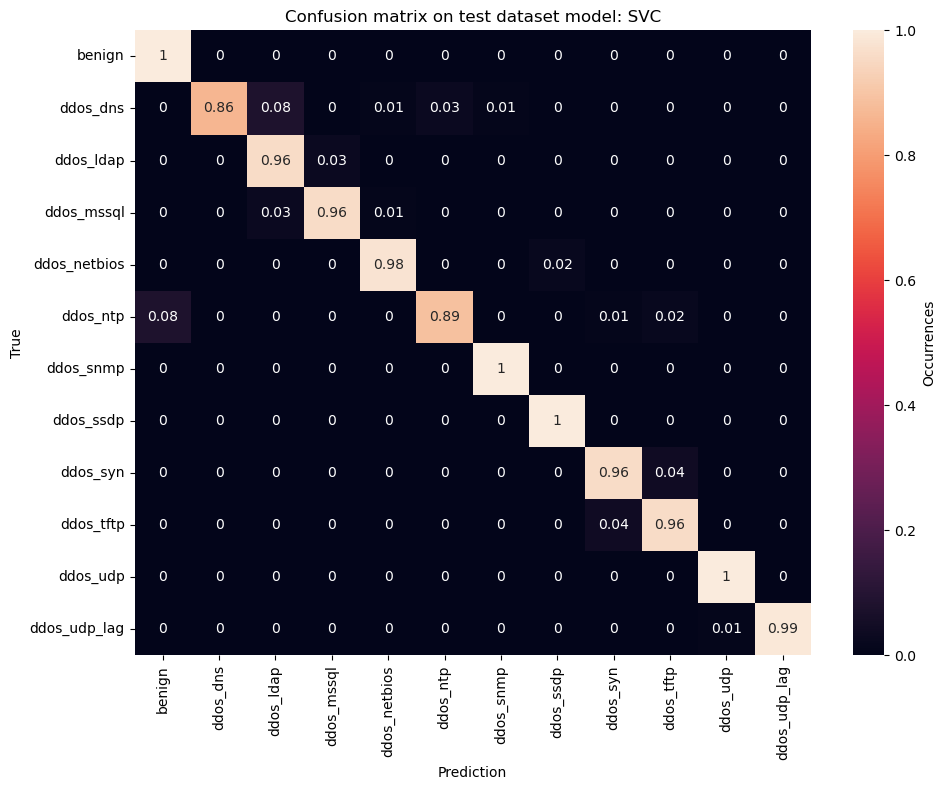

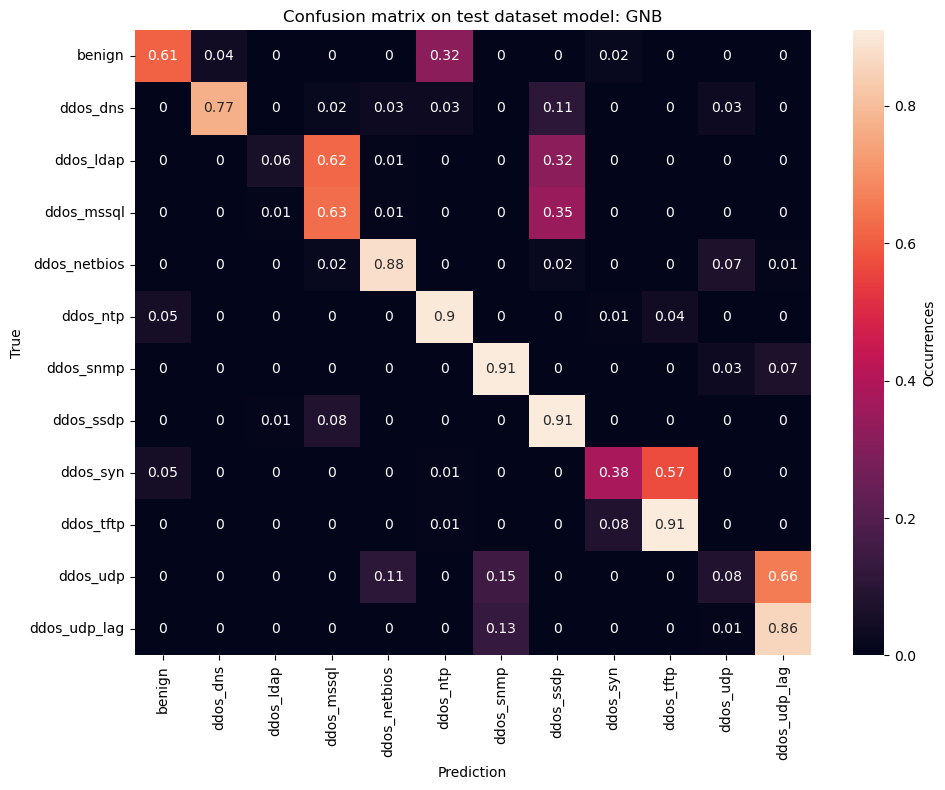

In [26]:
print('model: KNN')
print('train set predictions evaluation')
print(classification_report(y_train, y_pred_train_KNN))
print('test set predictions evaluation')
print(classification_report(y_test, y_pred_test_KNN))

print('model: RFC')
print('train set predictions evaluation')
print(classification_report(y_train, y_pred_train_RFC))
print('test set predictions evaluation')
print(classification_report(y_test, y_pred_test_RFC))

print('model: SVC')
print('train set predictions evaluation')
print(classification_report(y_train, y_pred_train_SVC))
print('test set predictions evaluation')
print(classification_report(y_test, y_pred_test_SVC))

print('model: Gaussian NB')
print('train se predictions evaluation')
print(classification_report(y_train, y_pred_train_GNB))
print('test set predictions evaluation')
print(classification_report(y_test, y_pred_test_GNB))

train_predicted = [y_pred_train_KNN_num, y_pred_train_RFC_num, y_pred_train_SVC_num, y_pred_train_GNB_num]
test_predicted = [y_pred_test_KNN_num, y_pred_test_RFC_num, y_pred_test_SVC_num, y_pred_test_GNB_num]
models = ["KNN", "RFC", "SVC", "GNB"]

for i, label in enumerate(train_predicted):    
    # get the confusion matrix of test set
    conf_matrix = confusion_matrix(y_train_num, label)
    confusion_test = (conf_matrix / np.sum(conf_matrix, axis=1, keepdims=True)).round(2)

    # visualize the confusion matrix
    plt.figure(figsize=(10,8))
    sns.heatmap(confusion_test, cmap='Blues', annot=True, cbar_kws={'label':'Occurrences'}, xticklabels=unique_labels, yticklabels=unique_labels)
    plt.xlabel('Prediction')
    plt.ylabel('True')
    plt.title(f'Confusion matrix on train dataset model: {models[i]}')
    plt.show()

for i, label in enumerate(test_predicted):    
    # get the confusion matrix of test set
    conf_matrix = confusion_matrix(y_test_num, label)
    confusion_test = (conf_matrix / np.sum(conf_matrix, axis=1, keepdims=True)).round(2)
    
    # visualize the confusion matrix
    plt.figure(figsize=(10,8))
    sns.heatmap(confusion_test,  annot=True, cbar_kws={'label':'Occurrences'}, xticklabels=unique_labels, yticklabels=unique_labels)
    plt.xlabel('Prediction')
    plt.ylabel('True')
    plt.title(f'Confusion matrix on test dataset model: {models[i]}')
    plt.tight_layout()
    plt.show()

It is clear that the best model is RFC for this task of multi-classification. GNN is the model that performs the worst. There are few feature that are classified erroneously in all the three models: 
ddos_dns (true) misclassified with ddos_ldap, ddos_netbios, ddos_ntp 
ddos_ldap (true) misclassified with ddos_mssql (prediction) and viceversa with same percentage
ddos_ntp (true) misclassified with benign (prediction)
ddos_syn (true) misclassified with ddos_tftp (prediction) 0.02% highest misclassified value for random forest classifier
ddos_tftp (true) misclassified with ddos_syn (prediction)
ddos_udp_lag (true) misclassified with ddos_udp (prediction)
all misclassification are equal to 0.01% for RFC, for the other models the percentage increases (due to their worse performance), but the classes involved in the misclassification are the same.


Cross validation 

In [4]:
from sklearn.model_selection import GridSearchCV
import numpy as np

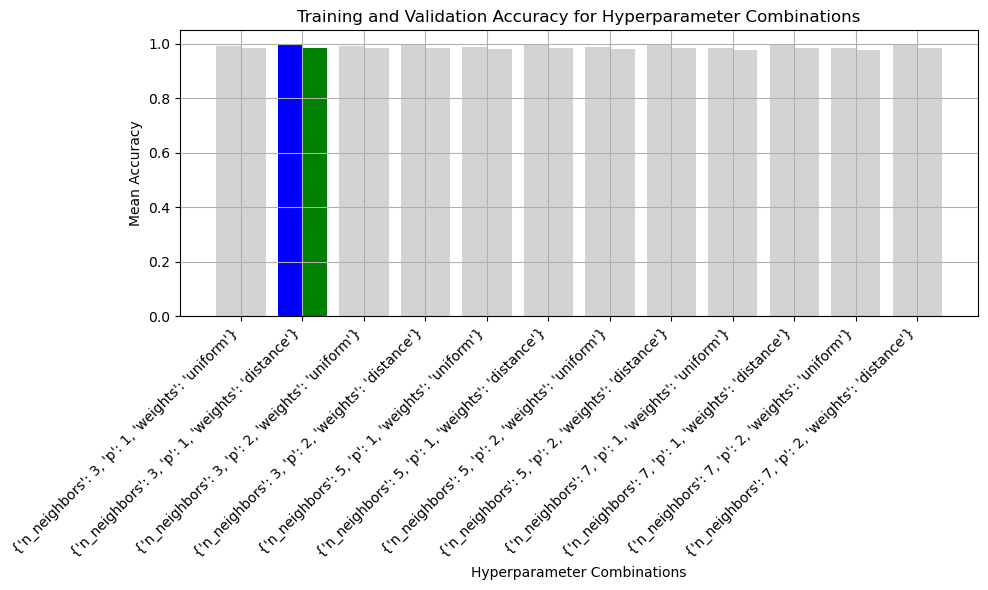

{'n_neighbors': 3, 'p': 1, 'weights': 'distance'}


In [7]:

knn_param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1 for Manhattan distance (L1), 2 for Euclidean distance (L2)
}

gsCV = GridSearchCV(estimator=model_KNN, param_grid=knn_param_grid, scoring='accuracy', cv=5, return_train_score=True)
gsCV.fit(X_train, y_train)

results = gsCV.cv_results_
# Extract the mean training and validation scores
mean_train_scores = results['mean_train_score']
mean_validation_scores = results['mean_test_score']

# Extract the hyperparameter combinations
param_combinations = [str(params) for params in results['params']]

best_params = gsCV.best_params_
# Plot the results
fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(len(param_combinations))

best_params_index= param_combinations.index(str(best_params))
bar_colors_train = ['lightgray' if i != best_params_index else 'blue' for i in range(len(param_combinations))]
bar_colors_validation = ['lightgray' if i != best_params_index else 'green' for i in range(len(param_combinations))]
ax.bar(x - 0.2, mean_train_scores, width=0.4, label='Training Accuracy', align='center', color=bar_colors_train)
ax.bar(x + 0.2, mean_validation_scores, width=0.4, label='Validation Accuracy', align='center', color=bar_colors_validation)

ax.set_xticks(x)
ax.set_xticklabels(param_combinations, rotation=45, ha='right')
ax.set_xlabel('Hyperparameter Combinations')
ax.set_ylabel('Mean Accuracy')
ax.set_title('Training and Validation Accuracy for Hyperparameter Combinations')
plt.grid()
plt.tight_layout()
plt.show()

print(best_params)

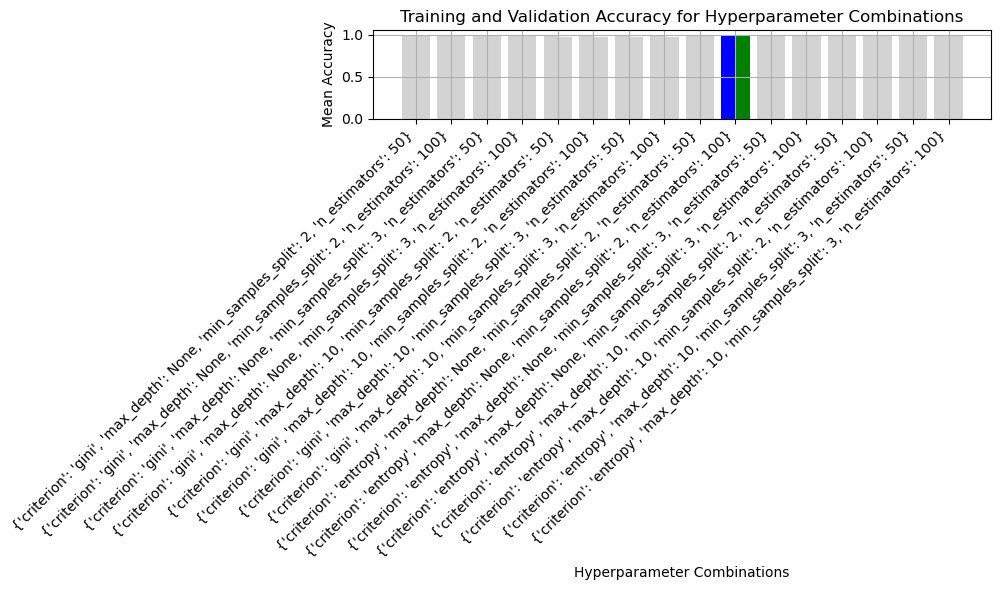

{'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
[0.99998332 1.         0.99993328 0.99998332 0.98381035 0.98439967
 0.98368248 0.98417173 0.99999444 1.         0.99994996 0.99998888
 0.98878066 0.98888073 0.98860275 0.98937554]
[0.98883625 0.98908087 0.98839149 0.98868057 0.97400318 0.97422556
 0.97411436 0.9744479  0.98912535 0.98916984 0.98883625 0.98899191
 0.97871772 0.97896237 0.97836189 0.9794961 ]


In [11]:
rf_param_grid = {
    'criterion':['gini', 'entropy'],
    'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'min_samples_split': [2, 3],
}

#gsCV = GridSearchCV(estimator=model_RFC, param_grid=rf_param_grid, scoring='accuracy', cv=5, return_train_score=True)
#gsCV.fit(X_train, y_train)

results = gsCV.cv_results_
# Extract the mean training and validation scores
mean_train_scores = results['mean_train_score']
mean_validation_scores = results['mean_test_score']

# Extract the hyperparameter combinations
param_combinations = [str(params) for params in results['params']]

best_params = gsCV.best_params_
# Plot the results
fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(len(param_combinations))

best_params_index= param_combinations.index(str(best_params))
bar_colors_train = ['lightgray' if i != best_params_index else 'blue' for i in range(len(param_combinations))]
bar_colors_validation = ['lightgray' if i != best_params_index else 'green' for i in range(len(param_combinations))]
ax.bar(x - 0.2, mean_train_scores, width=0.4, label='Training Accuracy', align='center', color=bar_colors_train)
ax.bar(x + 0.2, mean_validation_scores, width=0.4, label='Validation Accuracy', align='center', color=bar_colors_validation)

ax.set_xticks(x)
ax.set_xticklabels(param_combinations, rotation=45, ha='right')
ax.set_xlabel('Hyperparameter Combinations')
ax.set_ylabel('Mean Accuracy')
ax.set_title('Training and Validation Accuracy for Hyperparameter Combinations')
plt.grid()
plt.tight_layout()
plt.show()

print(best_params)
print(mean_train_scores)
print(mean_validation_scores)


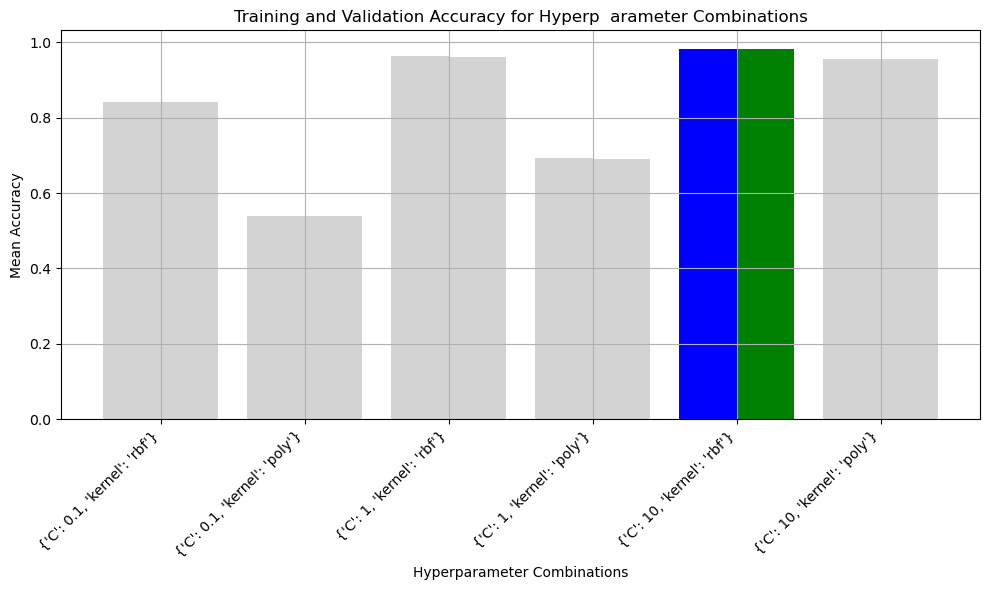

{'C': 10, 'kernel': 'rbf'}


In [13]:
svc_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['rbf', 'poly']
    
}

#gsCV = GridSearchCV(estimator=model_SVC, param_grid=svc_param_grid, scoring='accuracy', cv=5, return_train_score=True)
#gsCV.fit(X_train, y_train)

results = gsCV.cv_results_
# Extract the mean training and validation scores
mean_train_scores = results['mean_train_score']
mean_validation_scores = results['mean_test_score']
print(mean_train_scores)
print(mean_validation_scores)
# Extract the hyperparameter combinations
param_combinations = [str(params) for params in results['params']]

best_params = gsCV.best_params_
# Plot the results
fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(len(param_combinations))

best_params_index= param_combinations.index(str(best_params))
bar_colors_train = ['lightgray' if i != best_params_index else 'blue' for i in range(len(param_combinations))]
bar_colors_validation = ['lightgray' if i != best_params_index else 'green' for i in range(len(param_combinations))]
ax.bar(x - 0.2, mean_train_scores, width=0.4, label='Training Accuracy', align='center', color=bar_colors_train)
ax.bar(x + 0.2, mean_validation_scores, width=0.4, label='Validation Accuracy', align='center', color=bar_colors_validation)

ax.set_xticks(x)
ax.set_xticklabels(param_combinations, rotation=45, ha='right')
ax.set_xlabel('Hyperparameter Combinations')
ax.set_ylabel('Mean Accuracy')
ax.set_title('Training and Validation Accuracy for Hyperp  arameter Combinations')
plt.grid()
plt.tight_layout()
plt.show()

print(best_params)

[0.63613846 0.63613846 0.63614402 0.63616626 0.63619962]
[0.63606741 0.63606741 0.63606741 0.63606741 0.63615636]


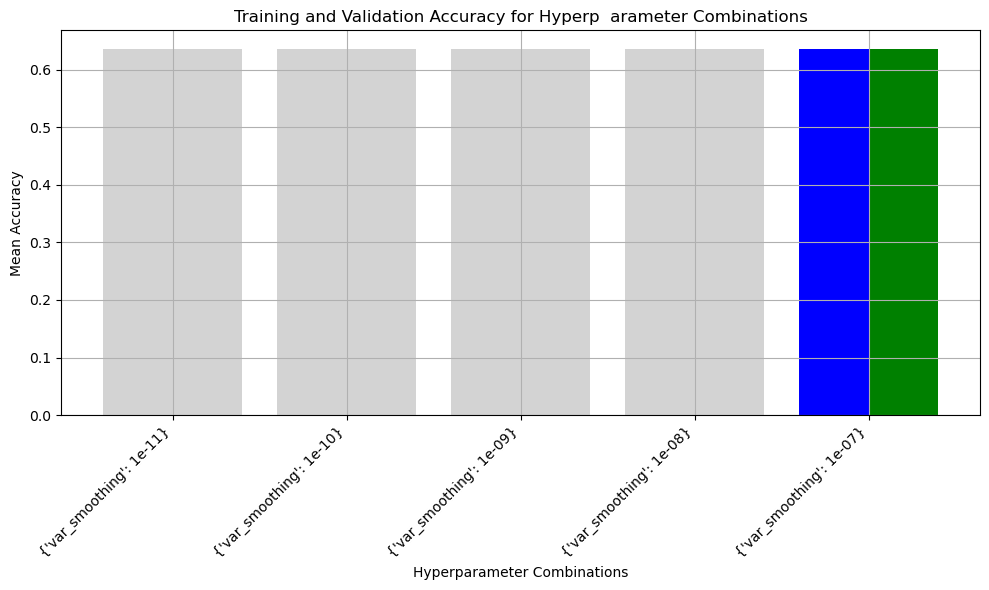

{'var_smoothing': 1e-07}
[0.63613846 0.63613846 0.63614402 0.63616626 0.63619962]
[0.63606741 0.63606741 0.63606741 0.63606741 0.63615636]


In [8]:
gnb_param_grid = {
    'var_smoothing': [1e-11, 1e-10, 1e-9, 1e-8, 1e-7]
    
}

gsCV = GridSearchCV(estimator=model_GNB, param_grid=gnb_param_grid, scoring='accuracy', cv=5, return_train_score=True)
gsCV.fit(X_train, y_train)

results = gsCV.cv_results_
# Extract the mean training and validation scores
mean_train_scores = results['mean_train_score']
mean_validation_scores = results['mean_test_score']
print(mean_train_scores)
print(mean_validation_scores)
# Extract the hyperparameter combinations
param_combinations = [str(params) for params in results['params']]

best_params = gsCV.best_params_
# Plot the results
fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(len(param_combinations))

best_params_index= param_combinations.index(str(best_params))
bar_colors_train = ['lightgray' if i != best_params_index else 'blue' for i in range(len(param_combinations))]
bar_colors_validation = ['lightgray' if i != best_params_index else 'green' for i in range(len(param_combinations))]
ax.bar(x - 0.2, mean_train_scores, width=0.4, label='Training Accuracy', align='center', color=bar_colors_train)
ax.bar(x + 0.2, mean_validation_scores, width=0.4, label='Validation Accuracy', align='center', color=bar_colors_validation)

ax.set_xticks(x)
ax.set_xticklabels(param_combinations, rotation=45, ha='right')
ax.set_xlabel('Hyperparameter Combinations')
ax.set_ylabel('Mean Accuracy')
ax.set_title('Training and Validation Accuracy for Hyperp  arameter Combinations')
plt.grid()
plt.tight_layout()
plt.show()

print(best_params)
print(mean_train_scores)
print(mean_validation_scores)

Once we find the best hyperparameters for each model, we can investigate the false positive and false negative

model: final KNN
train set predictions evaluation
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      3961
           1       0.98      0.96      0.97      3758
           2       0.97      0.97      0.97      4149
           3       0.98      0.98      0.98      4138
           4       0.99      0.99      0.99      4081
           5       0.95      0.97      0.96       690
           6       1.00      1.00      1.00      4189
           7       0.99      1.00      1.00      4179
           8       0.99      0.99      0.99      3836
           9       0.99      0.99      0.99      3683
          10       1.00      1.00      1.00      4113
          11       1.00      1.00      1.00      4190

    accuracy                           0.99     44967
   macro avg       0.99      0.99      0.99     44967
weighted avg       0.99      0.99      0.99     44967

model: base KNN
              precision    recall  f1-score   support

           0

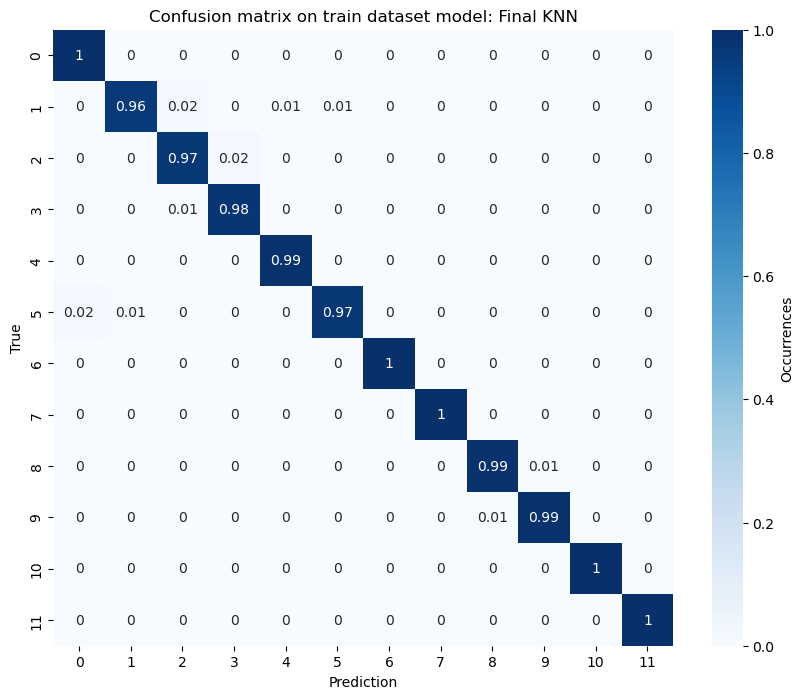

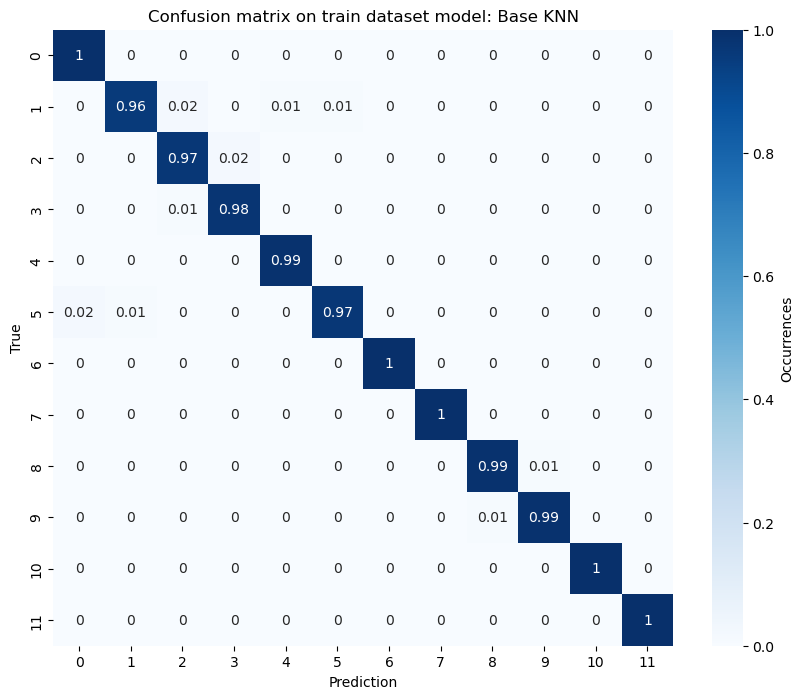

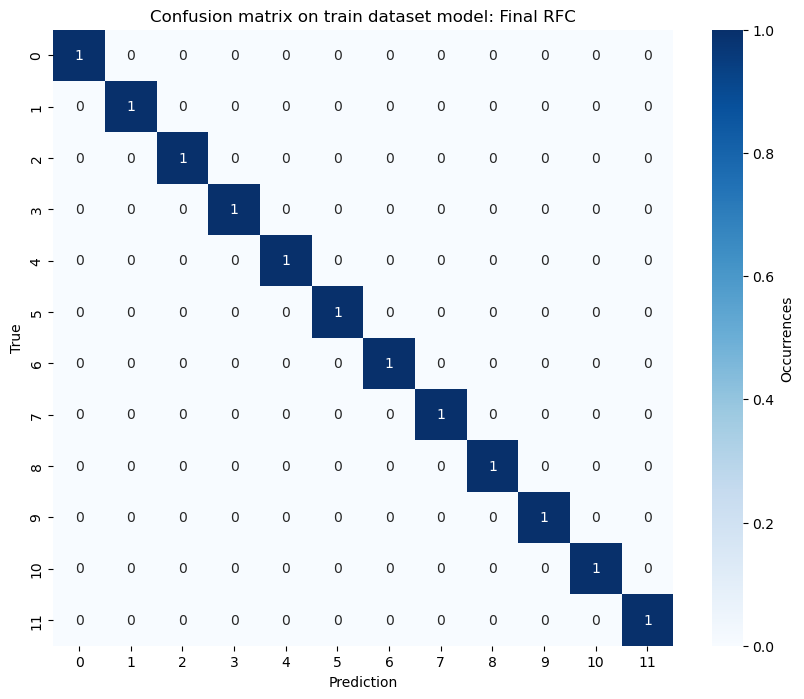

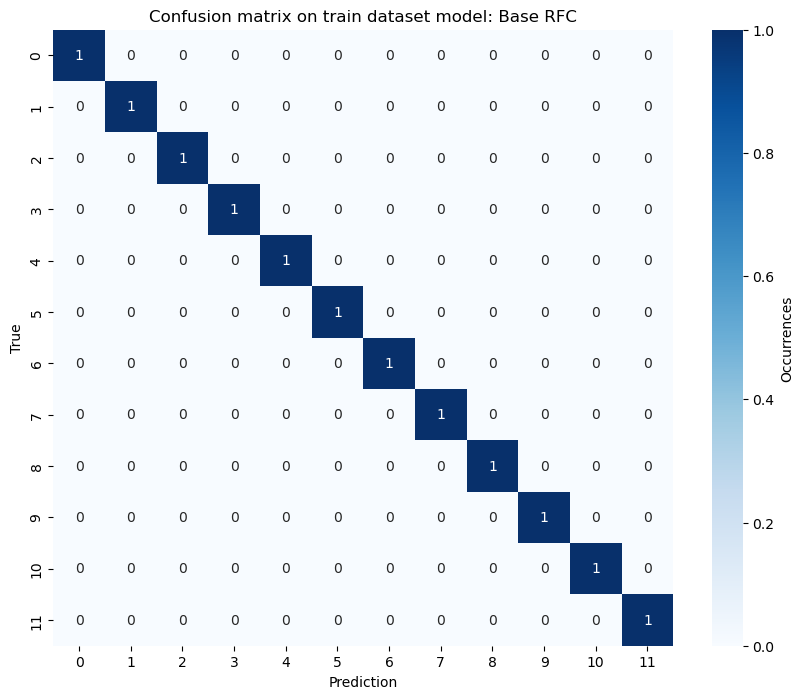

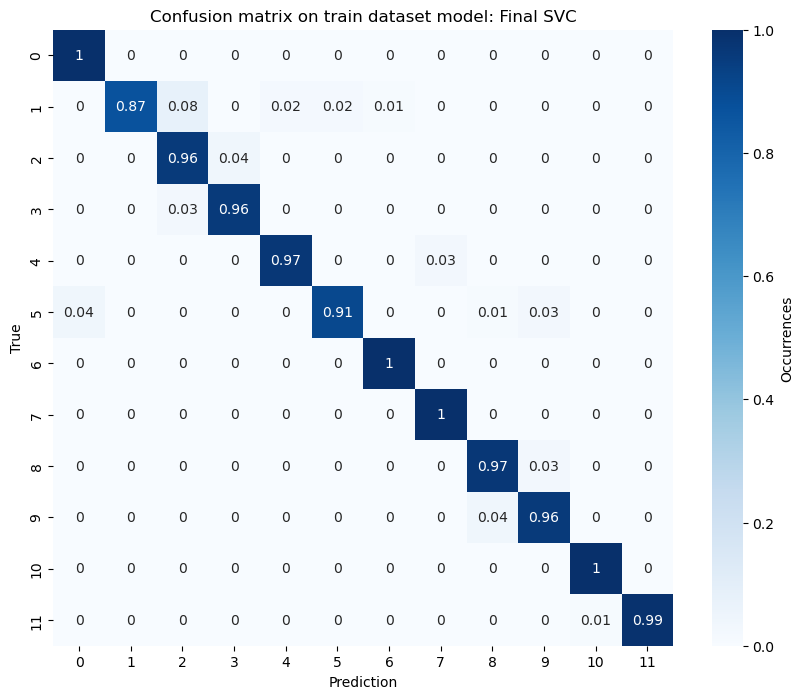

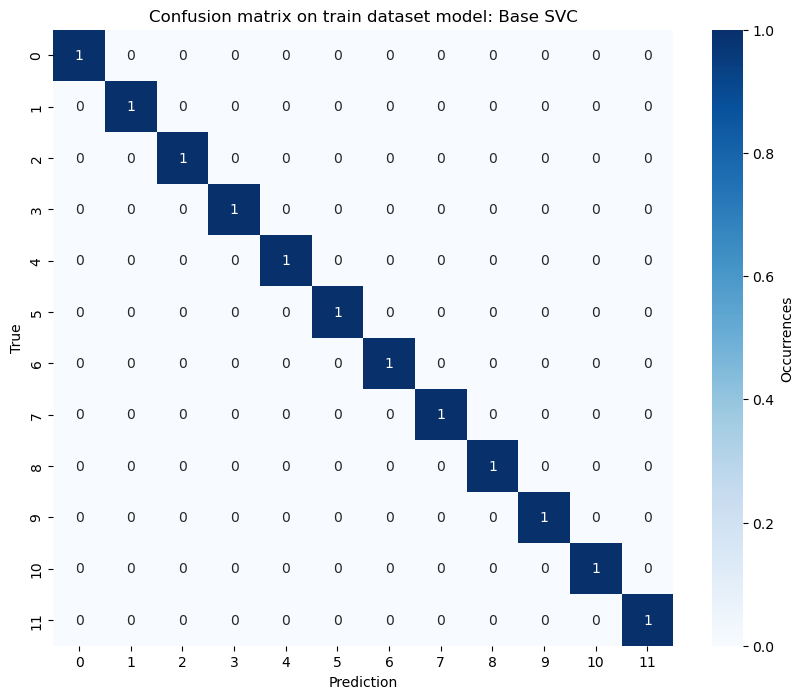

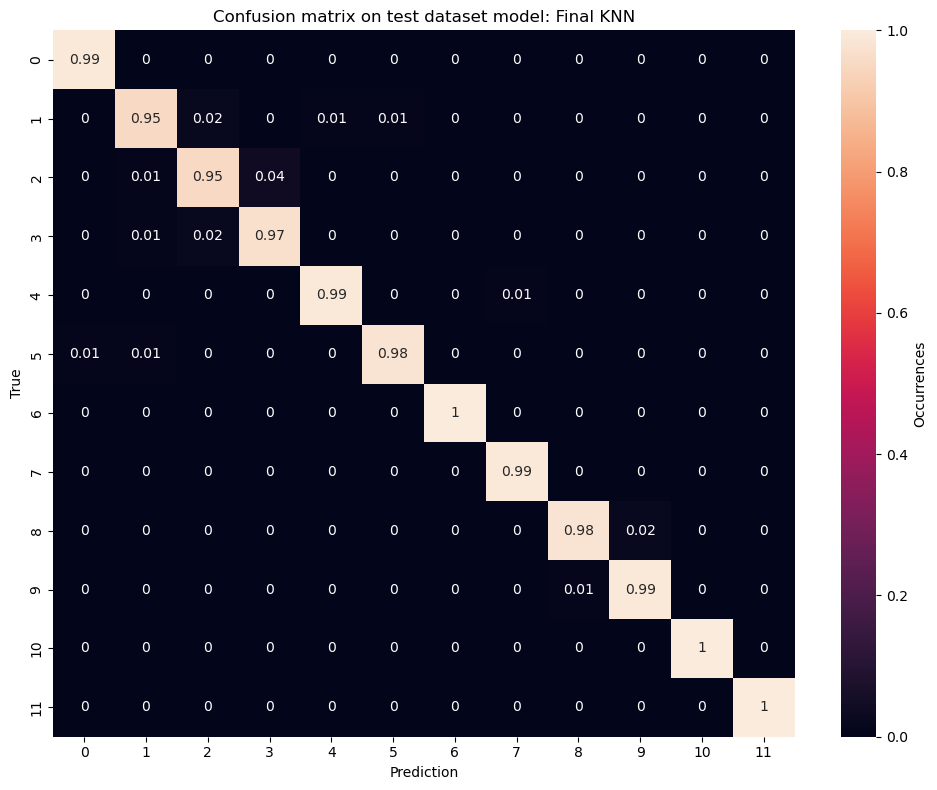

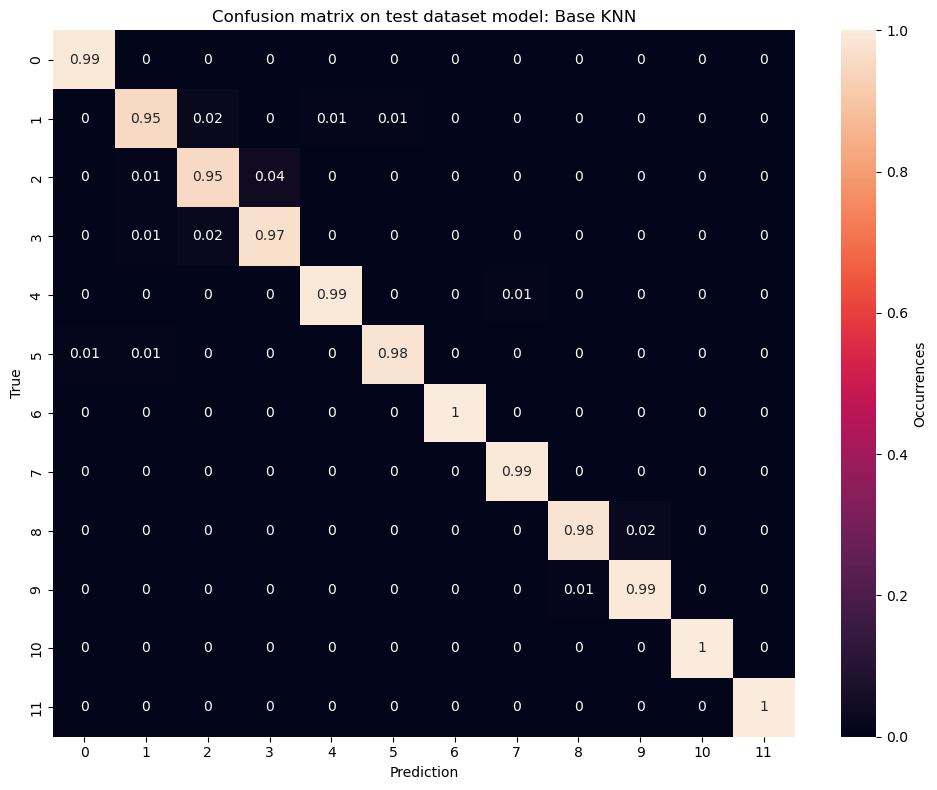

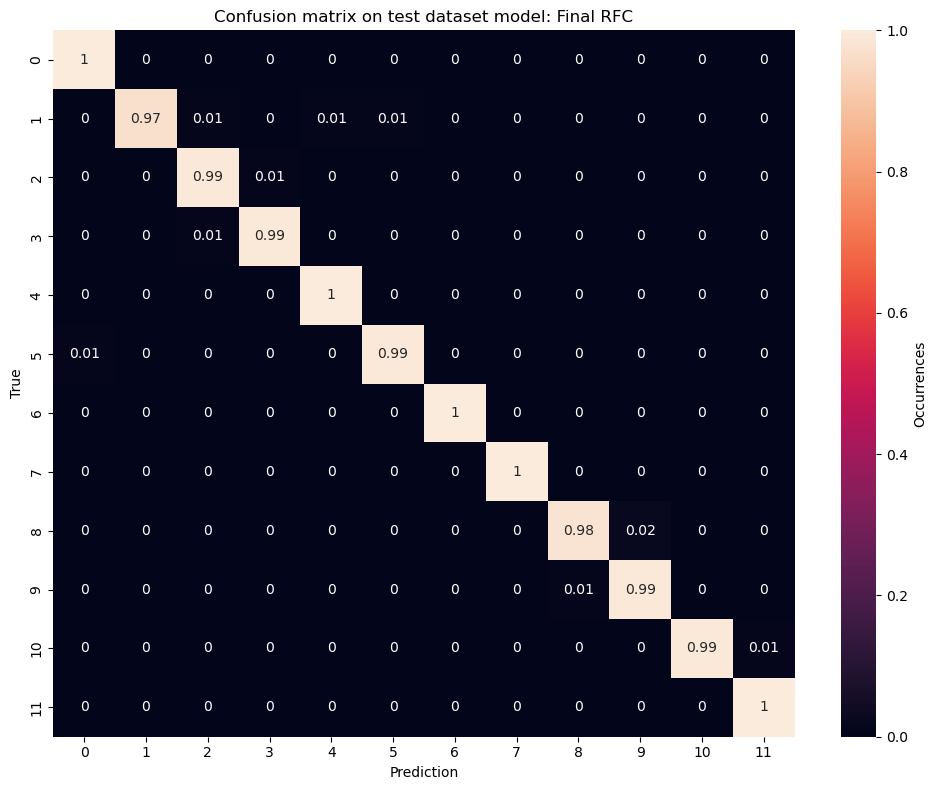

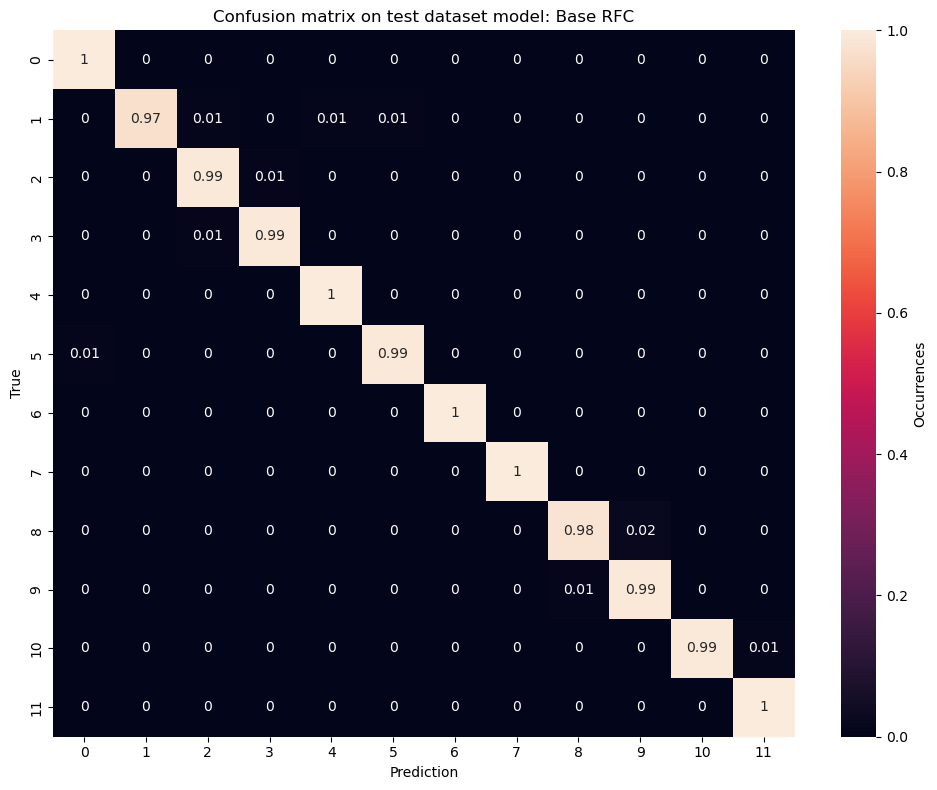

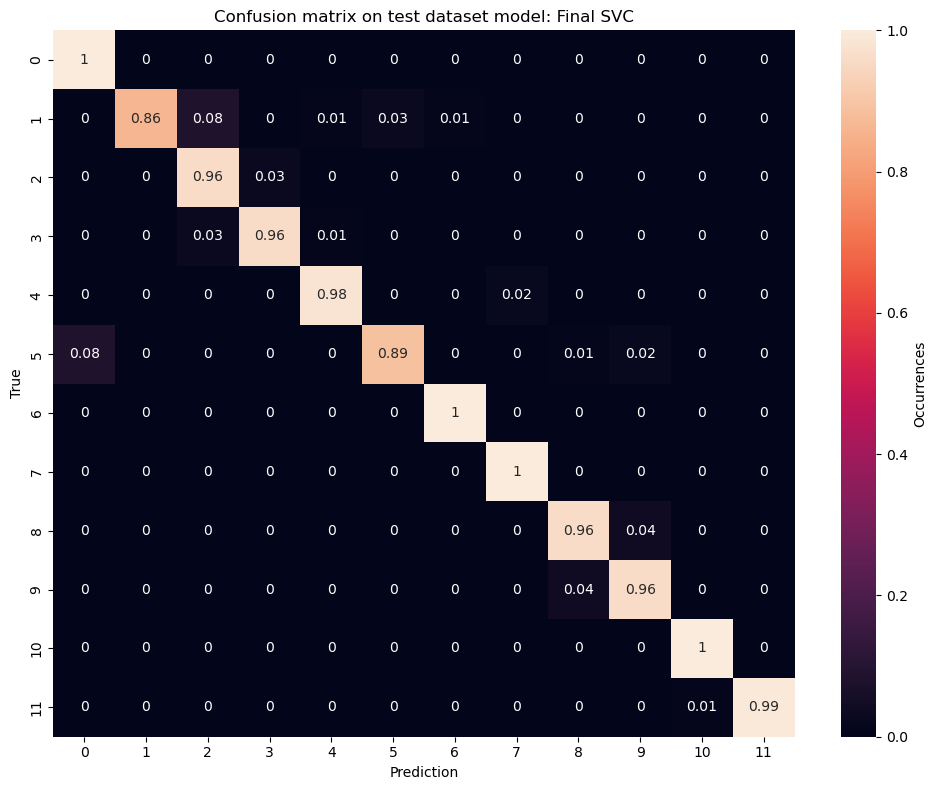

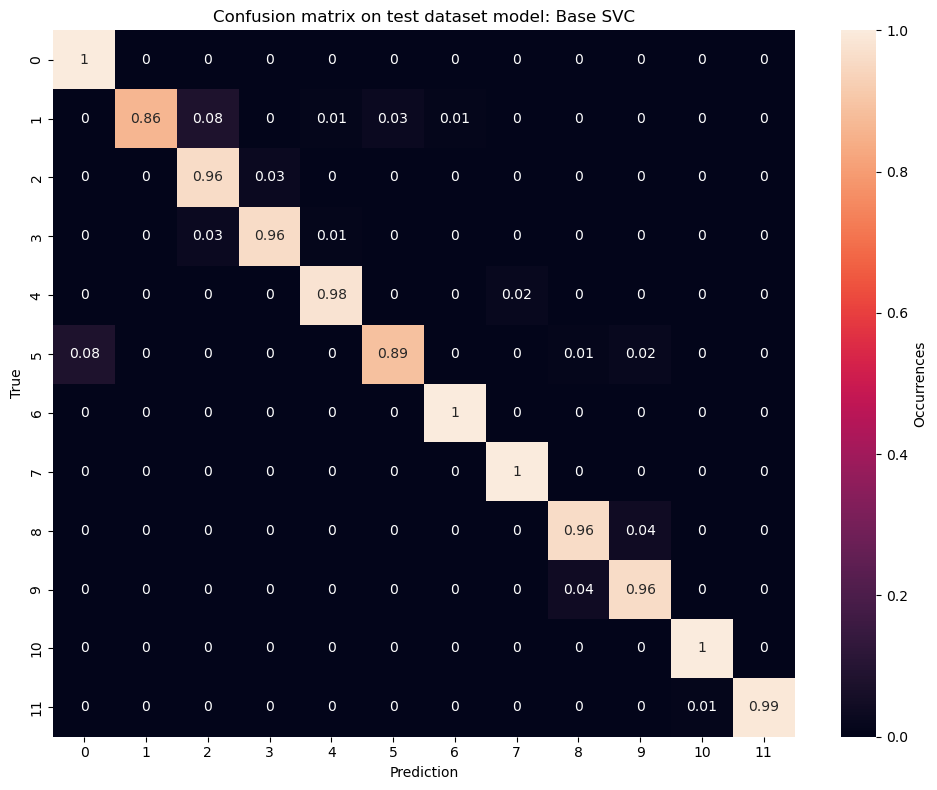

In [5]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

final_model_KNN = KNeighborsClassifier(n_neighbors=3, p=1, weights='distance')
final_model_KNN.fit(X_train, y_train)

final_model_RFC = RandomForestClassifier(criterion='entropy', max_depth=None, min_samples_split=2, n_estimators=100)
final_model_RFC.fit(X_train, y_train)

final_model_SVC = SVC(C=10,kernel='rbf')
final_model_SVC.fit(X_train, y_train)

y_pred_train_final_KNN = model_KNN.predict(X_train)
y_pred_test_final_KNN = model_KNN.predict(X_test)

y_pred_train_final_RFC = model_RFC.predict(X_train)
y_pred_test_final_RFC = model_RFC.predict(X_test)

y_pred_train_final_SVC = model_SVC.predict(X_train)
y_pred_test_final_SVC = model_SVC.predict(X_test)

print('model: final KNN')
print('train set predictions evaluation')
print(classification_report(y_train, y_pred_train_final_KNN))
print('model: base KNN')
print(classification_report(y_train, y_pred_train_KNN))
print('test set predictions evaluation')
print('model: final KNN')
print(classification_report(y_test, y_pred_test_final_KNN))
print(classification_report(y_test, y_pred_test_KNN))

print('model: final RFC')
print('train set predictions evaluation')
print(classification_report(y_train, y_pred_train_final_RFC))
print('model: base RFV')
print(classification_report(y_train, y_pred_train_RFC))
print('test set predictions evaluation')
print('model: final RFC')
print(classification_report(y_test, y_pred_test_final_RFC))
print('model: base RFC')
print(classification_report(y_test, y_pred_test_RFC))

print('model: final SVC')
print('train set predictions evaluation')
print(classification_report(y_train, y_pred_train_final_SVC))
print('model: base SVC')
print(classification_report(y_train, y_pred_train_SVC))
print('test set predictions evaluation')
print('model: final SVC')
print(classification_report(y_test, y_pred_test_final_SVC))
print('model: base SVC')
print(classification_report(y_test, y_pred_test_SVC))

train_predicted = [y_pred_train_final_KNN, y_pred_train_KNN, y_pred_train_final_RFC, y_pred_train_RFC, y_pred_train_final_SVC, y_pred_train_RFC]
test_predicted = [y_pred_test_final_KNN, y_pred_test_KNN, y_pred_test_final_RFC, y_pred_test_RFC, y_pred_test_final_SVC, y_pred_test_SVC]
models = ["Final KNN", "Base KNN", "Final RFC", "Base RFC", "Final SVC", "Base SVC"]

for i, label in enumerate(train_predicted):    
    # get the confusion matrix of test set
    conf_matrix = confusion_matrix(y_train, label)
    confusion_test = (conf_matrix / np.sum(conf_matrix, axis=1, keepdims=True)).round(2)
    # visualize the confusion matrix
    plt.figure(figsize=(10,8))
    sns.heatmap(confusion_test, cmap='Blues', annot=True, cbar_kws={'label':'Occurrences'})
    plt.xlabel('Prediction')
    plt.ylabel('True')
    plt.title(f'Confusion matrix on train dataset model: {models[i]}')
    plt.show()

for i, label in enumerate(test_predicted):    
    # get the confusion matrix of test set
    conf_matrix = confusion_matrix(y_test, label)
    confusion_test = (conf_matrix / np.sum(conf_matrix, axis=1, keepdims=True)).round(2)
    
    # visualize the confusion matrix
    plt.figure(figsize=(10,8))
    sns.heatmap(confusion_test,  annot=True, cbar_kws={'label':'Occurrences'})
    plt.xlabel('Prediction')
    plt.ylabel('True')
    plt.title(f'Confusion matrix on test dataset model: {models[i]}')
    plt.tight_layout()
    plt.show()

Even after cross validation an the consequent hyperparameter tuning we have the same behavior of the base models. The misclassification is represented by the same classes and since also the base model (SVC and RFC) had a great score even on unseen data, there is no sensible upgrade of performance.
**To be done, change the categorical label in string labels to evaluate which are the classes involved in the misclassification and try to figure why they are misclassified